<a href="https://colab.research.google.com/github/sprucesunday777/Real-Estate-price-prediction--/blob/main/Real_estate_prices_prediction_in_Nigeria_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing of the necessary libraries

In [ ]:

!pip install pyodbc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.5/343.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install datasist
import datasist as ds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.1 MB/s eta 0:00:00


In [ ]:

# reading the test dataset to a panda dataframe
# the test dataset
test= pd.read_csv('//content/Housing_dataset_test.csv')

In [ ]:

# reading the train dataset to a panda dataframe
# the test dataset
train= pd.read_csv('/content/Housing_dataset_train (1).csv')

In [ ]:

#viewing of the first 5 data in the test set
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [ ]:
test.shape

(6000, 6)

In [ ]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [ ]:
train.shape

(14000, 7)

In [ ]:
train['ind'] = 1
test['ind'] = 0

# /content/Housing_dataset_train (1).csv train and test DataFrames
df = pd.concat([train,test])

# Output the combined DataFrame
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1


In [ ]:
df.describe()

,ID,bedroom,bathroom,parking_space,price,ind
count,20000.000000,18201.000000,18195.000000,18189.000000,1.400000e+04,20000.000000
mean,4849.500000,4.315312,3.124815,3.157458,2.138082e+06,0.700000
std,3822.507531,2.445600,2.035028,1.601164,1.083057e+06,0.458269
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05,0.000000
25%,1666.000000,2.000000,1.000000,2.000000,1.393990e+06,0.000000
50%,3499.500000,4.000000,2.000000,3.000000,1.895223e+06,1.000000
75%,7999.250000,6.000000,5.000000,4.000000,2.586699e+06,1.000000
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             20000 non-null  int64  
 1   loc            18187 non-null  object 
 2   title          18278 non-null  object 
 3   bedroom        18201 non-null  float64
 4   bathroom       18195 non-null  float64
 5   parking_space  18189 non-null  float64
 6   price          14000 non-null  float64
 7   ind            20000 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
ds.structdata.describe(train)

First five data points


,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898




Random five data points


,ID,loc,title,bedroom,bathroom,parking_space,price
8212,7534,Rivers,Detached duplex,3.0,NaN,5.0,2.856861e+06
4932,1639,NaN,Flat,9.0,6.0,3.0,2.776430e+06
533,2244,Plateau,NaN,1.0,1.0,4.0,9.236676e+05
5207,1074,NaN,NaN,3.0,1.0,1.0,1.172146e+06
9934,504,Ebonyi,Apartment,3.0,2.0,NaN,1.033246e+06




Last five data points


,ID,loc,title,bedroom,bathroom,parking_space,price
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718
13999,8787,Nasarawa,NaN,9.0,7.0,5.0,2858516.890




Shape of  data set: (14000, 7)


Size of  data set: 98000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
ID,int64
loc,object
title,object
bedroom,float64
bathroom,float64
parking_space,float64
price,float64




Numerical Features in Data set
['ID', 'bedroom', 'bathroom', 'parking_space', 'price']


Categorical Features in Data set


['loc', 'title']



Statistical Description of Columns


,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07




Description of Categorical Features


,count,unique,top,freq
loc,12187,36,Kaduna,370
title,12278,10,Flat,1372




Unique class Count of Categorical features


,Feature,Unique Count
0,loc,37
1,title,11




Missing Values in Data


,features,missing_counts,missing_percent
0,ID,0,0.0
1,loc,1813,13.0
2,title,1722,12.3
3,bedroom,1799,12.8
4,bathroom,1805,12.9
5,parking_space,1811,12.9
6,price,0,0.0


Unique Values in loc is too large to plot




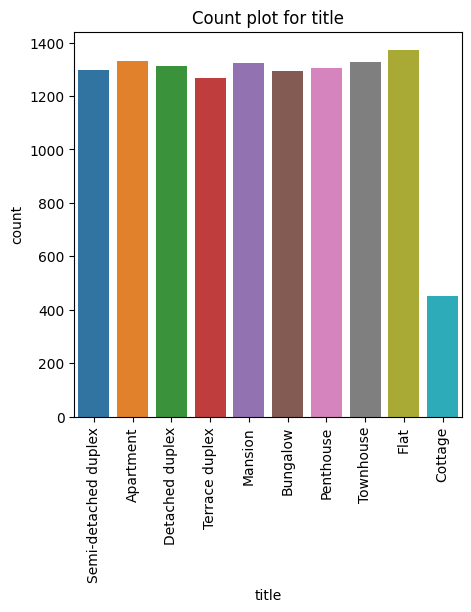

In [ ]:

ds.visualizations.countplot(train)

In [ ]:
df.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price',
       'ind'],
      dtype='object')

In [ ]:

#dropping of missing data since only 30% was missing
df.dropna(inplace=True)

In [ ]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

## since the train dataset is what we will use in Prediction, we clean the train dataset first

In [ ]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


Drop ID column since it's not necessary

In [ ]:
df=train.drop('ID',axis=1)

In [ ]:
df.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


<ipython-input-24-be9210e29b14>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='price', palette='his')


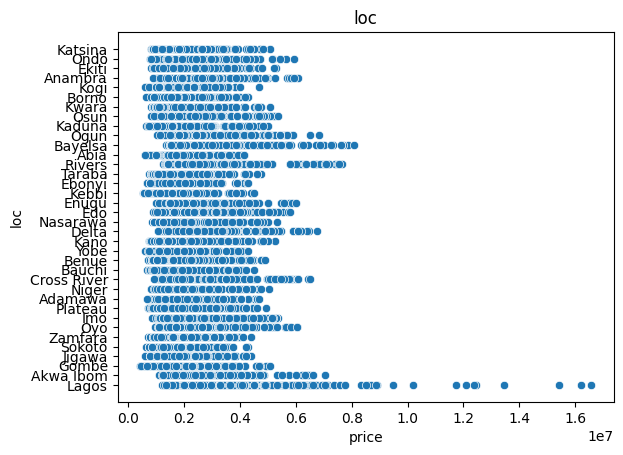

<ipython-input-24-be9210e29b14>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='price', palette='his')


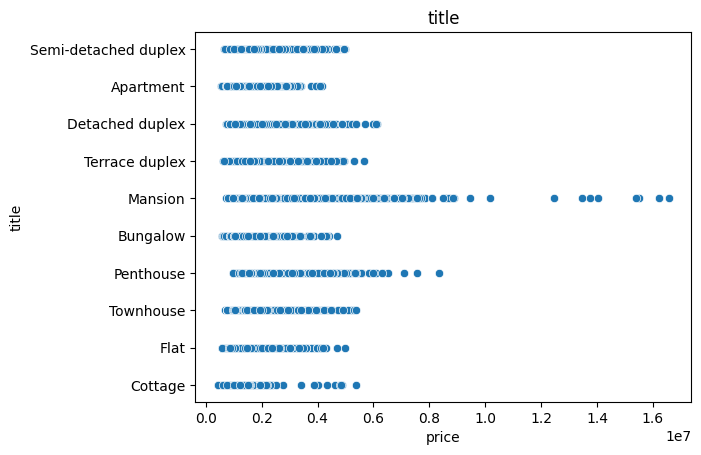

<ipython-input-24-be9210e29b14>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='price', palette='his')


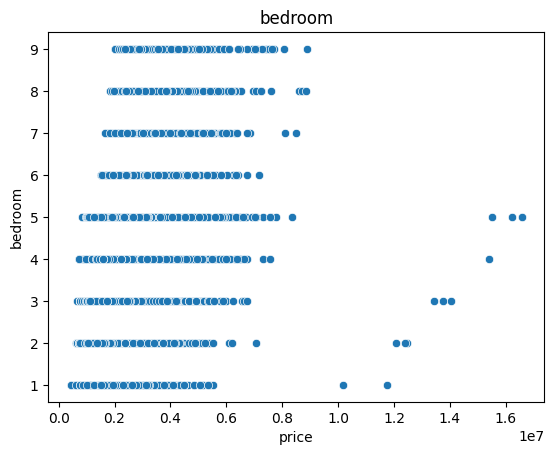

<ipython-input-24-be9210e29b14>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='price', palette='his')


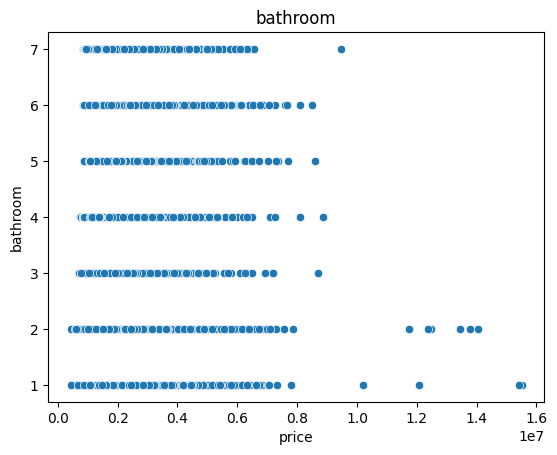

<ipython-input-24-be9210e29b14>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='price', palette='his')


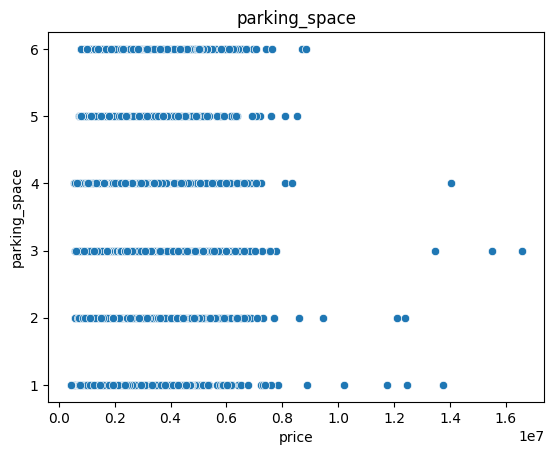

<ipython-input-24-be9210e29b14>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='price', palette='his')


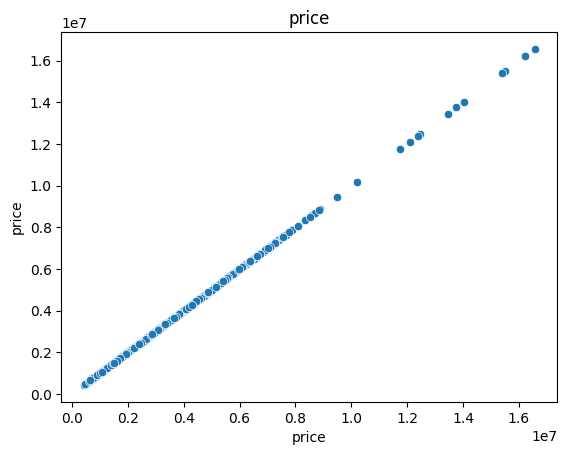

In [ ]:
for column in df1.columns:
    sns.scatterplot(data=df,y=column,x='price', palette='his')
    plt.title(column)
    plt.show()

In [ ]:
df1.columns

Index(['loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [ ]:
df['loc'].unique()

array(['Katsina', 'Ondo', 'Ekiti', 'Anambra', 'Kogi', 'Borno', 'Kwara',
       'Osun', 'Kaduna', 'Ogun', 'Bayelsa', nan, 'Abia', 'Rivers',
       'Taraba', 'Ebonyi', 'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Delta',
       'Kano', 'Yobe', 'Benue', 'Bauchi', 'Cross River', 'Niger',
       'Adamawa', 'Plateau', 'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa',
       'Gombe', 'Akwa Ibom', 'Lagos'], dtype=object)

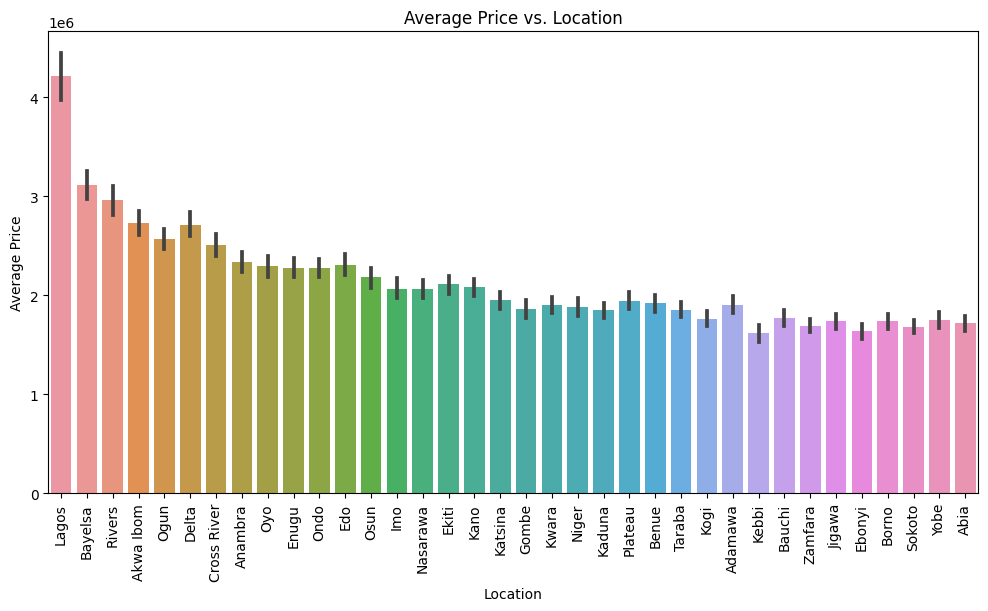

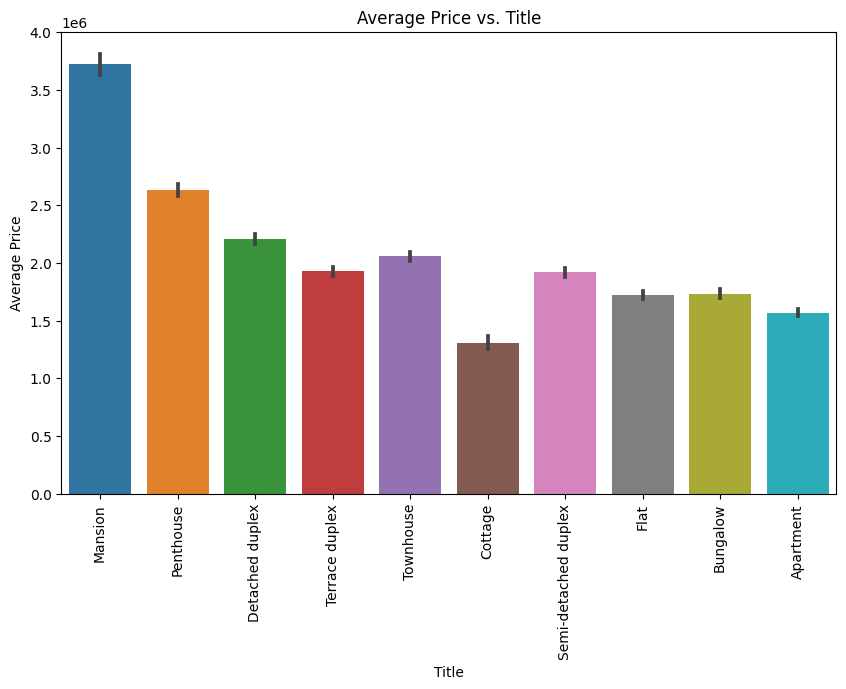

In [ ]:
# Relationship between 'loc' and 'price'
plt.figure(figsize=(12, 6))
df.sort_values('price',axis=0,ascending=False, inplace=True)
sns.barplot(x='loc', y='price', data=df)
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Average Price vs. Location')
plt.xticks(rotation=90)
plt.show()

# Relationship between 'title' and 'price'
plt.figure(figsize=(10, 6))
df.sort_values('price',axis=0,ascending=False, inplace=True)
sns.barplot(x='title', y='price', data=df)
plt.xlabel('Title')
plt.ylabel('Average Price')
plt.title('Average Price vs. Title')
plt.xticks(rotation=90)
plt.show()

## from the barplot above, Lagos had the highest amount of price while mansion had the highest amount of price for the title of houses

In [ ]:
df.columns

Index(['loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

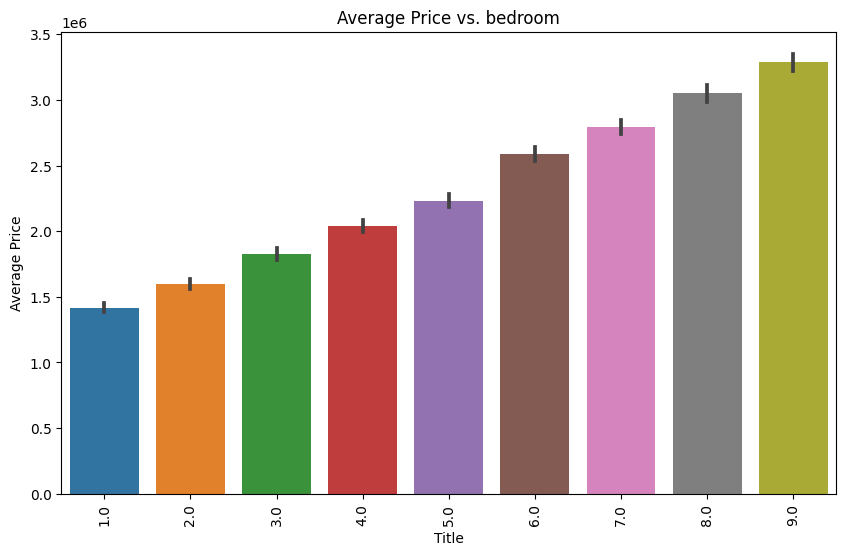

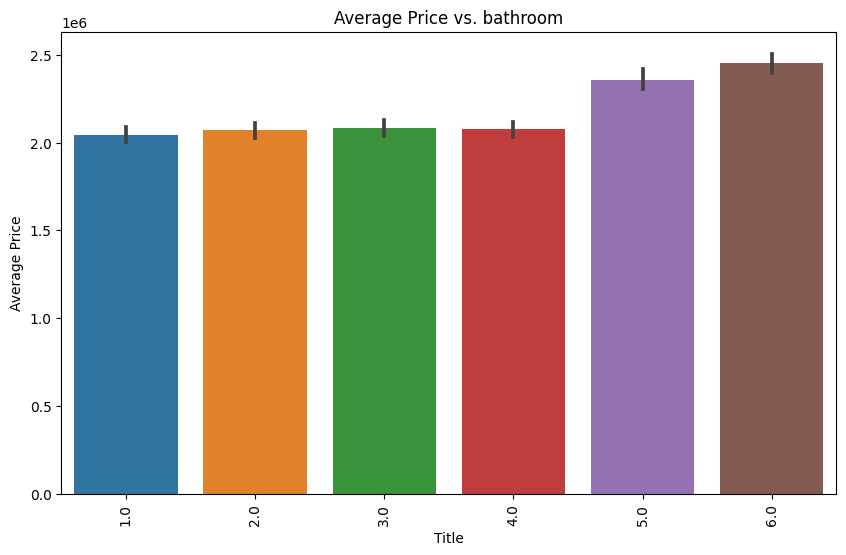

In [ ]:

# Relationship between 'bedroom' and 'price'
plt.figure(figsize=(10, 6))
df.sort_values('price',axis=0,ascending=False, inplace=True)
sns.barplot(x='bedroom', y='price', data=df)
plt.xlabel('Title')
plt.ylabel('Average Price')
plt.title('Average Price vs. bedroom')
plt.xticks(rotation=90)
plt.show()


# Relationship between 'parking space' and 'price'
plt.figure(figsize=(10, 6))
df.sort_values('price',axis=0,ascending=False, inplace=True)
sns.barplot(x='parking_space', y='price', data=df)
plt.xlabel('Title')
plt.ylabel('Average Price')
plt.title('Average Price vs. oarking_space')
plt.xticks(rotation=90)
plt.show()

More bedroom will have the tendency of having high amount of house prices same with bathrom

In [ ]:
df.columns

Index(['loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

<ipython-input-46-001c1530e3d9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


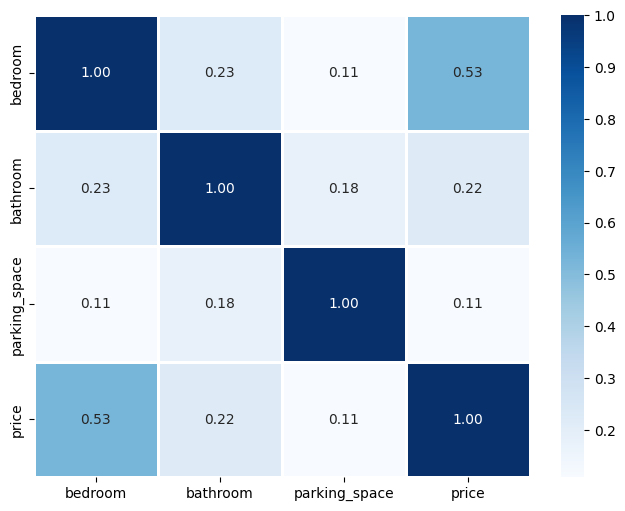

In [ ]:
# to see the correlation among all the variables
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),
            cmap = 'Blues',
            fmt = '.2f',
            linewidths = 2,
            annot = True);

## to check the relationship and how this feature will affect the prices, I called correlation function on the train dataset

In [ ]:
df.isnull().sum()

loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [ ]:
df['loc']

7969     Lagos
1734     Lagos
3793       NaN
11375    Lagos
8507       NaN
         ...  
13446    Kebbi
2759     Gombe
667      Kebbi
13538    Gombe
4481     Gombe
Name: loc, Length: 14000, dtype: object

In [ ]:

df.columns

Index(['loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

##data cleaning

##For the numerical columns, missing values were filled by using mean function

In [ ]:
df['bedroom'].fillna(df['bedroom'].mean(), inplace=True)

df['bathroom'].fillna(df['bathroom'].mean(), inplace=True)
df['parking_space'].fillna(df['parking_space'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

loc              1813
title            1722
bedroom             0
bathroom            0
parking_space       0
price               0
dtype: int64

##for the category columns we used forward fillna function, that's replace the value with the any words above the missing values

In [ ]:
df['loc'].fillna(method='ffill', inplace=True)
df['title'].fillna(method='ffill', inplace=True)

In [ ]:
df.isnull().sum()

loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

## preprocessing

##since machine algorithm doesn't understand words but numbers, I changed the category Columns to numerical data by using category encoders function

In [ ]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.5 MB/s eta 0:00:00


In [ ]:
df.columns

Index(['loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [ ]:

import category_encoders as ce




# Initialize and apply OrdinalEncoder
encoder = ce.OrdinalEncoder([['loc', 'title', 'bedroom', 'bathroom', 'parking_space']])
df1 = encoder.fit_transform(df)

df1.head()

,loc,title,bedroom,bathroom,parking_space,price
0,1,1,2.000000,2.0,1.000000,1149999.565
1,2,2,4.308171,2.0,4.000000,1672416.689
2,3,2,7.000000,5.0,3.169825,3364799.814
3,4,3,5.000000,2.0,4.000000,2410306.756
4,5,4,4.308171,5.0,6.000000,2600700.898


##data training

## divide the train dataset to x and y, that's target and label

In [ ]:
# create the feature
x= df1.drop(columns = ['price'])

# create the target
y = df['price']

In [ ]:
y.head()

0    1149999.565
1    1672416.689
2    3364799.814
3    2410306.756
4    2600700.898
Name: price, dtype: float64

## split the data to 30% testing and 70% training

In [ ]:
# splitting the training dataset using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0)

In [ ]:
! pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train,y_test)

100%|██████████| 29/29 [00:00<00:00, 44.22it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


## since it's a continuous data, we used linear regression model for training

In [ ]:

from sklearn.linear_model import LinearRegression

In [ ]:

from sklearn.metrics import accuracy_score

# Create and train the LinearRegression
LR= LinearRegression()
LR.fit(X_train, y_train)

# Make predictions on the test set
predictions= LR.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 862329161074.0452
R-squared (R2) Score: 0.265973609953407


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X is your feature matrix and y is your continuous label vector

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

# Train the model
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 488722992372.2639
R-squared (R2) Score: 0.6111495818527829


## I now used cross validation inorder to achieve a better mean score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=5)  # cv is the number of folds (e.g., 5-fold cross-validation)

In [ ]:
mean_score = scores.mean()
std_score = scores.std()

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Load and preprocess your dataset (X and y)

# Create a Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, x, y, cv=5)

# Evaluate cross-validation results
mean_score = scores.mean()
std_score = scores.std()


print(f'Mean Score: {mean_score}')
print(f'Standard Deviation: {std_score}')

Mean Score: 0.26230360650621753
Standard Deviation: 0.015576418956156506


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load and preprocess your dataset (X and y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation on the training data
scores = cross_val_score(model, X_train, y_train, cv=5)

# Evaluate cross-validation results
mean_score = scores.mean()
std_score = scores.std()

print(f'Mean Score: {mean_score}')
print(f'Standard Deviation: {std_score}')

Mean Score: 0.2693167749832658
Standard Deviation: 0.032648932635715125


## checking for the feature importance

In [ ]:
# write a function to get the feature importance
def get_feature_importance (model, X_train, y_train):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = pd.Series(model.feature_importances_, index = X_train.columns)

    return feature_importances

In [ ]:

# Get the coefficients (weights) of the features
coefficients = model.coef_

# Match coefficients to feature names
feature_names = x.columns  # Assuming X is your feature matrix or DataFrame

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude to see feature importance
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the feature importance
print(feature_importance)

         Feature  Coefficient
2        bedroom    225485.03
3       bathroom     61018.75
4  parking_space     25520.67
1          title      4737.30
0            loc      4365.41


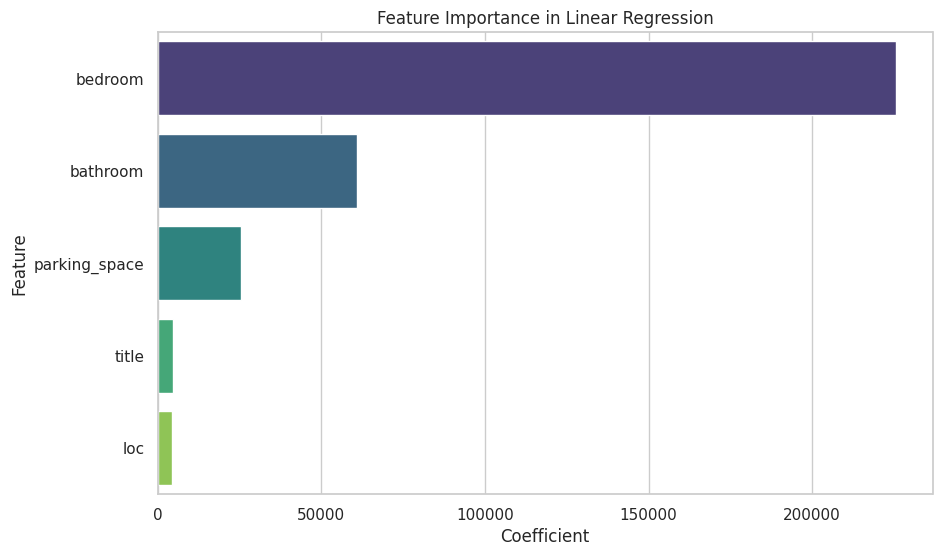

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot to display feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance, orient="h", palette="viridis")

# Customize the plot
plt.title("Feature Importance in Linear Regression")
plt.xlabel("Coefficient")
plt.ylabel("Feature")

# Show the plot
plt.show()

In [ ]:
import pickle

file=open('model.pkl','wb')
pickle.dump(model,file)